<a href="https://colab.research.google.com/github/pythonwithzeeshan/learn-lessons/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Age Classification**

**Libraries**

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

**Define Dataset**

In [6]:
X = np.array([[2],[5],[8],[12],[15],[18],[20],[25],[30],[35],[40],[45],[50],[60],[70]], dtype=np.float32)

In [7]:
y = np.array([[0],[0],[0],[0],[1],[1],[2],[2],[2],[2],[2],[2],[2],[2],[2]], dtype=np.float32)

**Convert numpay into Tensor**

In [8]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

**Visualize Actual data**

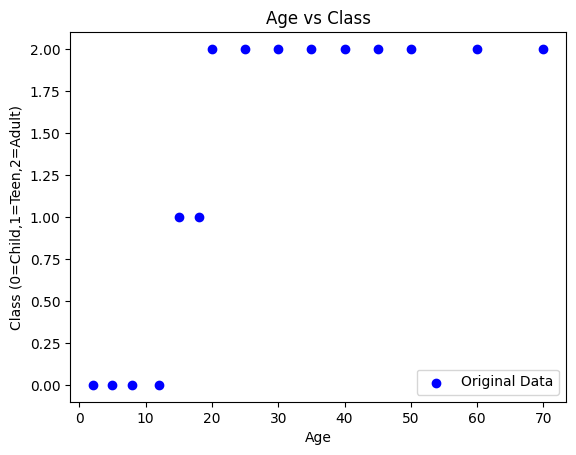

In [11]:
plt.scatter(X_tensor, y_tensor, color='blue', label='Original Data')
plt.xlabel("Age")
plt.ylabel("Class (0=Child,1=Teen,2=Adult)")
plt.title("Age vs Class")
plt.legend()
plt.show()